# Two Tone Mu Scan

This notebook is for analysing two tone scans recorded in e11scan.
Instructions can be found at [git/e11scan](https://github.com/lukelbro/scan). See two dimensional scans:

>>> It is possible to perform measurements in two dimensions - with a range of values in both `v0` and `v1`. For this type of analysis use the `scanmd` object. This object builds a list (`scanmd.sets`) of `scan` objects for each dataset associated with independent values of `v1`.  Each `scan` object contains the values of `v0` accessible through `scanmd.sets[0].x` as well as the associated `v1` value accessible through `scanmd.set[0].x2`.


### Microwave:
**Baseline processing:** baseline calculated from the signal of the lowest 10 microwave frequencies.

In [4]:
from e11scan import scan, scanmd
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import itertools

# Matlab colors
colors = itertools.cycle(['black', 'red', 'green', 'blue', 'cyan', 'magenta'])

### Load Data

In [5]:
function = 'a0 - a1'
fileyear = "2023"  # Replace with the desired year
filemonth = "05"  # Replace with the desired month
fileday = "31"  # Replace with the desired day
filesub = "013" # Replace with the desired file sub
filename = os.path.join("Q:\\E11_hybrid\\scan_data\\", fileyear, filemonth, fileday, 
                        fileyear + filemonth + fileday + "_" + filesub, 
                        fileyear + filemonth + fileday + "_" + filesub + "_scan.h5")
                        
scs = scanmd(filename=filename, function= function, experiment = 'microwave')

### Plot Data

Text(0, 0.5, 'a0 - a1')

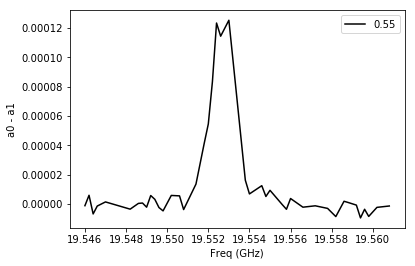

In [6]:
for sc, color in zip(scs.sets, colors):
    offset = 0  # sc.x2/3
    plt.plot(sc.x, sc.y + offset, label = sc.x2, color=color)

plt.legend()
plt.xlabel('Freq (GHz)')
plt.ylabel(function)

### Gaussian Fit
$$
A  e^{- \frac{(x-\mu)^2}{2 \sigma^2}}
$$

`p0()` and `varMatrix()` returns fit parameters in the order: `[A, mu, sigma]`


Text(0, 0.5, 'a0 - a1')

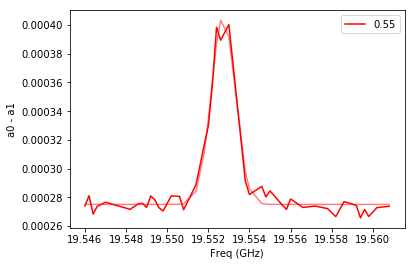

In [7]:
# If fit doesnt work change below, leave as guess = None for automatic fitting
guess = [-0.0005, sc.x[np.argmin(sc.y)],  3.329416220989014e-02]


for sc, color, in zip(scs.sets, colors): 
    if guess != None:
        sc.gauss.guess = guess
    offset = sc.x2/2000 # set to zero if not desired
    plt.plot(sc.x, sc.gauss.fit + offset, color= color, alpha = 0.5)
    plt.plot(sc.x, sc.y + offset, label=sc.x2, color=color)


plt.legend()
plt.xlabel('Freq (GHz)')
plt.ylabel(function)

<ErrorbarContainer object of 3 artists>

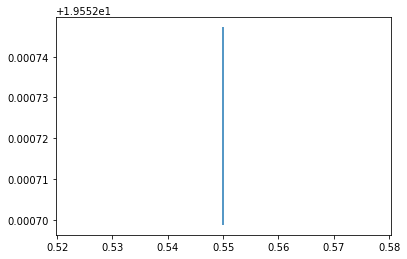

In [8]:
peaks = []
error = []
x2 = []
for sc in scs.sets:
    peaks.append(sc.gauss.p0[1])
    error.append(np.sqrt(sc.gauss.varMatrix[1][1]))
    x2.append(sc.x2)

plt.errorbar(x2, peaks, error, linestyle = 'None')